<a href="https://colab.research.google.com/github/JVG4M35/Ideias/blob/main/teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça upload do seu arquivo .xls ou .xlsx:


Saving Salary_Data.xlsx to Salary_Data (3).xlsx
Arquivo carregado: Salary_Data (3).xlsx
Digite o número de linhas que deseja ler do arquivo: 12
Visualizando as 12 primeiras linhas do dataset:
    Age  Gender Education Level              Job Title  Years of Experience  \
0    32    Male      Bachelor's      Software Engineer                    5   
1    28  Female        Master's           Data Analyst                    3   
2    45    Male             PhD         Senior Manager                   15   
3    36  Female      Bachelor's        Sales Associate                    7   
4    52    Male        Master's               Director                   20   
5    29    Male      Bachelor's      Marketing Analyst                    2   
6    42  Female        Master's        Product Manager                   12   
7    31    Male      Bachelor's          Sales Manager                    4   
8    26  Female      Bachelor's  Marketing Coordinator                    1   
9    38    Male   

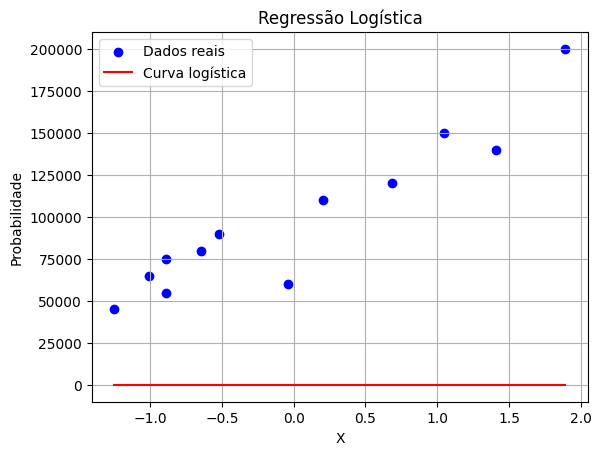

Treinando Rede Neural Artificial...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 3215.3997
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0000e+00 - loss: -7598.9009
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: -18311.3047
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: -29034.6250
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: -39364.0742
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0000e+00 - loss: -49020.6133
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0000e+00 - loss: -58973.9492
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: -68890.3984
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: -79228.4766
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0000e+00 - loss: -90254.7500
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0000e+00 - loss: -102

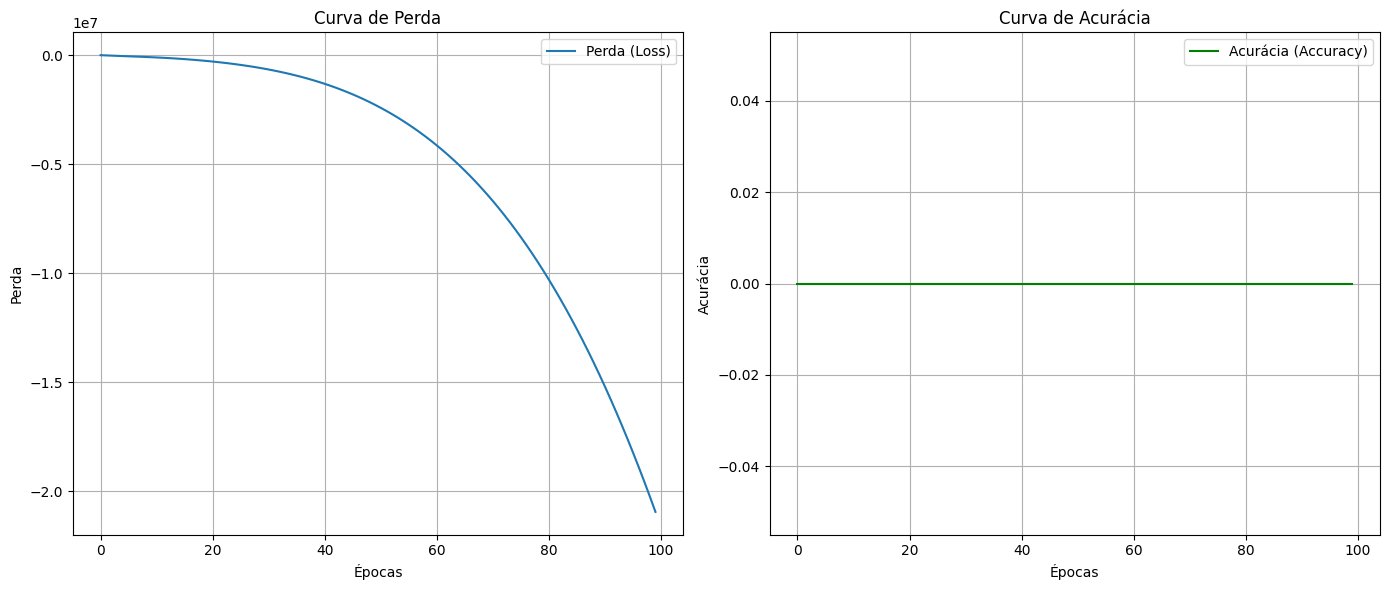

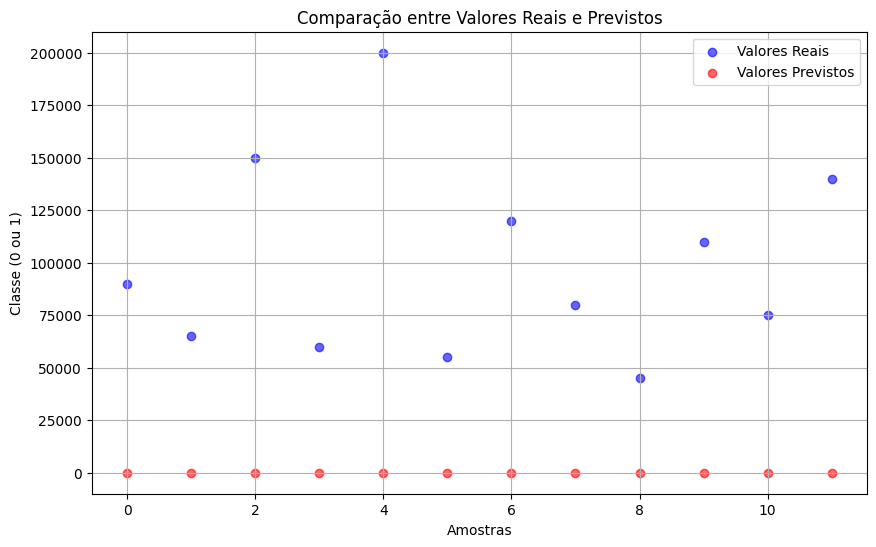

In [5]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from google.colab import files

# Função para carregar dataset via upload no Google Colab
def carregar_dataset_via_upload():
    """
    Faz upload de um arquivo .xls ou .xlsx no Google Colab e carrega os dados.

    Retorna:
    - dataset: O DataFrame do pandas com o dataset carregado.
    """
    print("Faça upload do seu arquivo .xls ou .xlsx:")
    uploaded = files.upload()

    # Verificar o nome do arquivo carregado
    file_name = list(uploaded.keys())[0]
    print(f"Arquivo carregado: {file_name}")

    # Perguntar ao usuário quantas linhas deseja carregar
    num_linhas = int(input("Digite o número de linhas que deseja ler do arquivo: "))

    # Ler as primeiras 'num_linhas' do arquivo .xls ou .xlsx
    dataset = pd.read_excel(file_name, nrows=num_linhas)

    # Exibir as primeiras 'num_linhas' do dataset para visualização
    print(f"Visualizando as {num_linhas} primeiras linhas do dataset:")
    print(dataset.head(num_linhas))

    # Exibir as colunas disponíveis no dataset
    print("\nColunas disponíveis no dataset:")
    print(dataset.columns.tolist())

    return dataset

# Inicializar variáveis para regressão logística
a = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Função sigmoid
def sigmoid(z):
    return 1 / (1 + tf.exp(-z))

# Função de perda para regressão logística
def calcular_perda_logistica(x_tensor, y_tensor):
    logits = a * x_tensor + b
    y_pred = sigmoid(logits)
    return -tf.reduce_mean(y_tensor * tf.math.log(y_pred + 1e-7) + (1 - y_tensor) * tf.math.log(1 - y_pred + 1e-7))

# Treinar modelo de regressão logística
def treinar_modelo_logistico(x_tensor, y_tensor, epochs, tol=1e-6):
    historico_perda = []
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            perda = calcular_perda_logistica(x_tensor, y_tensor)

        # Calcular gradientes
        gradientes = tape.gradient(perda, [a, b])

        # Aplicar gradientes
        optimizer.apply_gradients(zip(gradientes, [a, b]))

        perda_atual = perda.numpy()
        historico_perda.append(perda_atual)

        if epoch > 0 and abs(historico_perda[-1] - historico_perda[-2]) < tol:
            break

    return historico_perda

# Avaliação do modelo (regressão logística)
def avaliar_modelo(x, y):
    logits = a.numpy() * x + b.numpy()
    y_pred = sigmoid(logits) > 0.5

    # Caso os dados sejam binários, o cálculo será com 'binary'
    if len(set(y)) == 2:
        acc = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred, average='binary')
    else:
        # Para problemas multiclasses, usamos 'weighted' ou outro tipo de média
        acc = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred, average='weighted')

    return acc, f1

# Visualizar resultados (regressão logística)
def plotar_resultados_logistica(x, y):
    plt.scatter(x, y, label="Dados reais", color="blue")
    x_plot = sorted(x)
    y_plot = [sigmoid(a.numpy() * xi + b.numpy()) for xi in x_plot]
    plt.plot(x_plot, y_plot, color="red", label="Curva logística")
    plt.title("Regressão Logística")
    plt.xlabel("X")
    plt.ylabel("Probabilidade")
    plt.legend()
    plt.grid()
    plt.show()

# Treinar a rede neural
def treinar_rede_neural(x, y, input_dim, epochs, batch_size, learning_rate):
    """
    Treina uma Rede Neural Artificial simples.
    """
    # Criar o modelo
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, input_dim=input_dim, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Saída binária (0 ou 1)
    ])

    # Compilar o modelo
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Treinar o modelo
    history = model.fit(x, y, epochs=epochs, batch_size=batch_size, verbose=1)

    return model, history

# Visualizar resultados (rede neural)
def plotar_resultados_ann(history, y_true, y_pred):
    """
    Plota os resultados da Rede Neural Artificial:
    1. Curva de aprendizado (perda e precisão ao longo das épocas).
    2. Comparação entre valores reais e previstos.
    """
    # Curva de aprendizado
    plt.figure(figsize=(14, 6))

    # Gráfico de perda
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perda (Loss)')
    plt.title("Curva de Perda")
    plt.xlabel("Épocas")
    plt.ylabel("Perda")
    plt.legend()
    plt.grid()

    # Gráfico de precisão (se disponível)
    if 'accuracy' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Acurácia (Accuracy)', color='green')
        plt.title("Curva de Acurácia")
        plt.xlabel("Épocas")
        plt.ylabel("Acurácia")
        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()

    # Comparação entre valores reais e previstos
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_true)), y_true, color='blue', label='Valores Reais', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Valores Previstos', alpha=0.6)
    plt.title("Comparação entre Valores Reais e Previstos")
    plt.xlabel("Amostras")
    plt.ylabel("Classe (0 ou 1)")
    plt.legend()
    plt.grid()
    plt.show()

# Função principal
def executar_modelos():
    """
    Executa a Regressão Logística e a Rede Neural Artificial.
    """
    try:
        # Carregar o dataset via upload
        dataset = carregar_dataset_via_upload()

        # Input manual do nome das colunas X e Y
        coluna_x = input("Digite o nome da coluna X (variável independente): ").strip()
        coluna_y = input("Digite o nome da coluna Y (variável dependente): ").strip()

        # Verificar se as colunas existem no dataset
        if coluna_x not in dataset.columns or coluna_y not in dataset.columns:
            raise ValueError(f"Colunas '{coluna_x}' ou '{coluna_y}' não encontradas no arquivo.")

        # Carregar as colunas X e Y
        x = dataset[coluna_x].values
        y = dataset[coluna_y].values

        # Remover valores NaN nas colunas X e Y
        dataset_clean = dataset[[coluna_x, coluna_y]].dropna()
        x_clean = dataset_clean[coluna_x].values
        y_clean = dataset_clean[coluna_y].values

        # Normalizar os dados
        x_normalizado = (x_clean - x_clean.mean()) / x_clean.std()

        # Regressão Logística
        print("Treinando Regressão Logística...")
        historico_perda = treinar_modelo_logistico(
            tf.constant(x_normalizado, dtype=tf.float32),
            tf.constant(y_clean, dtype=tf.float32),
            epochs=1000
        )
        acc_log, f1_log = avaliar_modelo(x_normalizado, y_clean)
        print(f"Regressão Logística - Acurácia: {acc_log:.4f}, F1-Score: {f1_log:.4f}")
        plotar_resultados_logistica(x_normalizado, y_clean)

        # Rede Neural Artificial
        print("Treinando Rede Neural Artificial...")
        model, history = treinar_rede_neural(
            x_normalizado.reshape(-1, 1),
            y_clean,
            input_dim=1,
            epochs=100,
            batch_size=16,
            learning_rate=0.01
        )
        y_pred = (model.predict(x_normalizado.reshape(-1, 1)) > 0.5).astype(int).flatten()
        acc_ann = accuracy_score(y_clean, y_pred)
        f1_ann = f1_score(y_clean, y_pred, average='binary' if len(set(y_clean)) == 2 else 'weighted')
        print(f"Rede Neural - Acurácia: {acc_ann:.4f}, F1-Score: {f1_ann:.4f}")
        plotar_resultados_ann(history, y_clean, y_pred)

    except Exception as e:
        print(f"Erro: {e}")

# Executar
executar_modelos()
